In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Laiba\\AppData\\Roaming\\Python\\Python39\\site-packages\\~.mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Check the permissions.



In [2]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [3]:
pip install --upgrade --force-reinstall pillow

Defaulting to user installation because normal site-packages is not writeable
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Laiba\\AppData\\Roaming\\Python\\Python39\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Check the permissions.



In [4]:
pip install --upgrade --force-reinstall numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Laiba\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.2677 - loss: 1.9433 - val_accuracy: 0.5330 - val_loss: 1.2895
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5045 - loss: 1.3715 - val_accuracy: 0.6043 - val_loss: 1.0984
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5822 - loss: 1.1647 - val_accuracy: 0.6452 - val_loss: 1.0074
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6316 - loss: 1.0506 - val_accuracy: 0.6731 - val_loss: 0.9148
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6696 - loss: 0.9585 - val_accuracy: 0.6907 - val_loss: 0.8726
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6893 - loss: 0.8844 - val_accuracy: 0.6914 - val_loss: 0.8645
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7168 - loss: 0.7979 - val_accuracy: 0.7233 - val_loss: 0.7952
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7306 - loss: 0.7646 - 

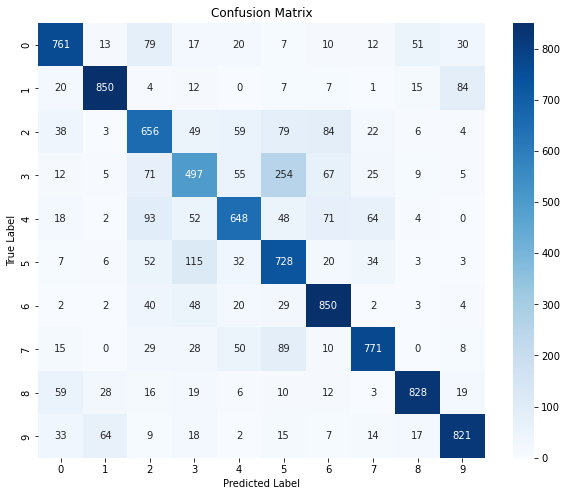

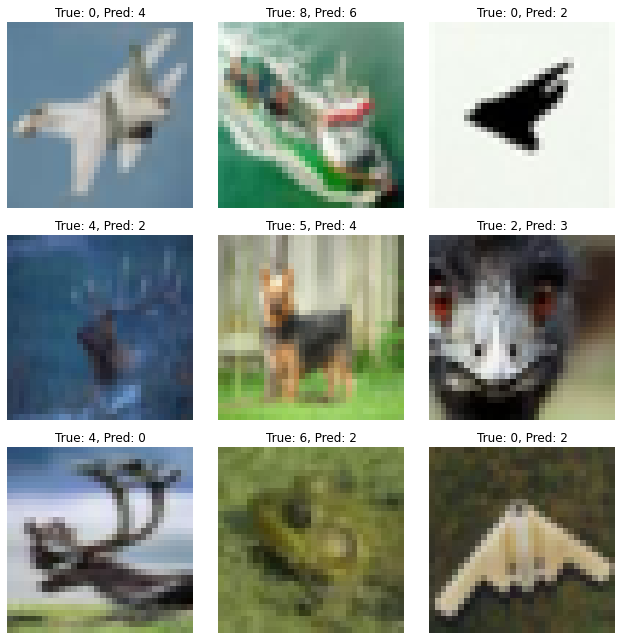

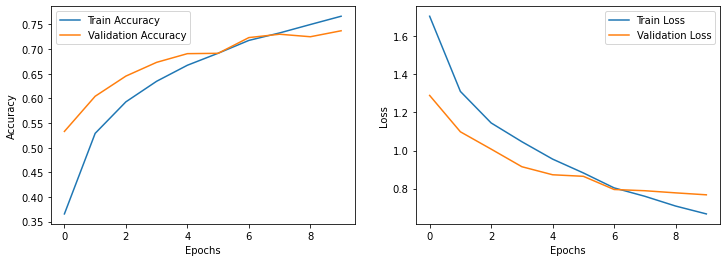

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load CIFAR-10 dataset from Hugging Face
dataset = load_dataset("cifar10")

# Convert dataset to numpy arrays
def process_data(data):
    images = np.array([np.array(img) for img in data["img"]], dtype=np.float32) / 255.0  # Normalize
    labels = np.array(data["label"])
    return images, labels

train_images, train_labels = process_data(dataset["train"])
test_images, test_labels = process_data(dataset["test"])

# One-hot encode labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),  # Explicit input layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Identify misclassified examples
misclassified_idxs = np.where(y_true != y_pred)[0]

# Plot some misclassified images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in range(9):
    idx = misclassified_idxs[i]
    axes[i].imshow(test_images[idx])
    axes[i].set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Compare results after data augmentation (flipping)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=15,   # Rotate images by ±15 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1, # Shift height by 10%
    horizontal_flip=True,  # Flip images horizontally
    zoom_range=0.1,  # Zoom images randomly
    fill_mode="nearest"
)

# Fit the generator to training data
datagen.fit(x_train)

# Train model using the augmented data
history_augmented =model.fit(datagen.flow(x_train, y_train, batch_size=64), 
          validation_data=(x_test, y_test),
          epochs=10)


Epoch 1/10


C:\Users\Laiba\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6490 - loss: 1.0251 - val_accuracy: 0.7251 - val_loss: 0.8224
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6728 - loss: 0.9533 - val_accuracy: 0.7333 - val_loss: 0.7678
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.6793 - loss: 0.9395 - val_accuracy: 0.7392 - val_loss: 0.7702
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.6896 - loss: 0.8993 - val_accuracy: 0.7509 - val_loss: 0.7242
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6945 - loss: 0.8836 - val_accuracy: 0.7458 - val_loss: 0.7359
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.7051 - loss: 0.8573 - val_accuracy: 0.7540 - val_loss: 0.7164
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7090 - loss: 0.8462 - val_accuracy: 0.7694 - val_loss: 0.6652
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7175 - loss: 0.8212 - val_accurac

In [5]:
test_loss_augmented, test_acc_augmented = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAugmented Test Accuracy: {test_acc_augmented:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.7424 - loss: 0.7669

Augmented Test Accuracy: 0.7424


In [6]:
print(f"Baseline Test Accuracy: {test_acc:.4f}")
print(f"Augmented Test Accuracy: {test_acc_augmented:.4f}")

if test_acc_augmented > test_acc:
    print("✅ Data Augmentation improved the model!")
else:
    print("⚠️ Data Augmentation did not improve accuracy significantly.")


Baseline Test Accuracy: 0.7410
Augmented Test Accuracy: 0.7424
✅ Data Augmentation improved the model!


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:

              precision    recall  f1-score   support

           0     0.0910    0.0890    0.0900      1000
           1     0.0986    0.1170    0.1070      1000
           2     0.1006    0.0870    0.0933      1000
           3     0.0926    0.0600    0.0728      1000
           4     0.0932    0.0840    0.0884      1000
           5     0.1086    0.0730    0.0873      1000
           6     0.1032    0.1530    0.1233      1000
           7     0.0975    0.1030    0.1002      1000
           8     0.0945    0.0900    0.0922      1000
           9     0.0969    0.1220    0.1080      1000

    accuracy                         0.0978     10000
   macro avg     0.0977    0.0978    0.0963     10000
weighted avg     0.0977    0.0978    0.0963     10000



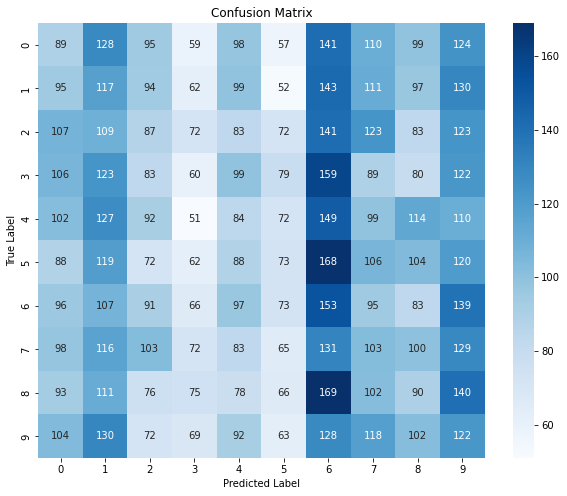

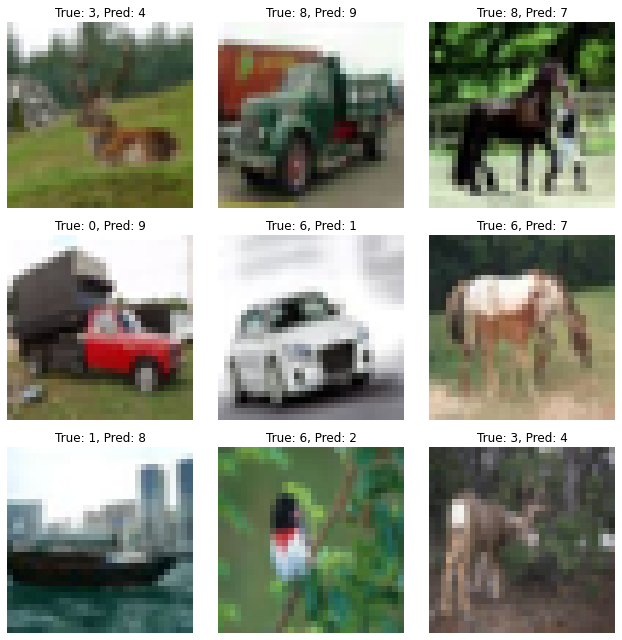

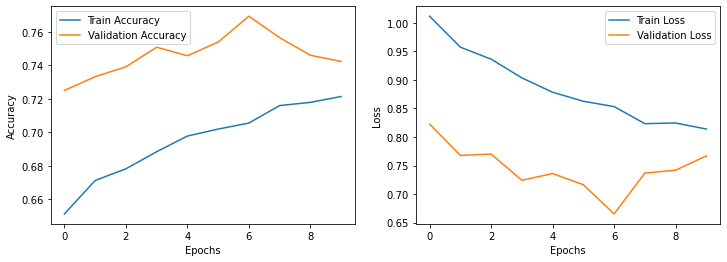

In [7]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Identify misclassified examples
misclassified_idxs = np.where(y_true != y_pred)[0]

# Plot some misclassified images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in range(9):
    idx = misclassified_idxs[i]
    axes[i].imshow(X_test[idx])
    axes[i].set_title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot training history for augmented model
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_augmented.history['loss'], label='Train Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Ablation Study: Impact of Hyperparameters on Accuracy

Learning Rate:

In [8]:
# Split data before one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# 🛑 Avoid double encoding: Check if labels are already one-hot
if y_train.ndim == 1 or y_train.shape[-1] != 10:  # Ensure last dim is 10 (one-hot format)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

print("Fixed y_train shape:", y_train.shape)  # Should be (40000, 10)

Fixed y_train shape: (40000, 10)



🔹 Training model with Learning Rate: 0.001


C:\Users\Laiba\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.2865 - loss: 1.9112 - val_accuracy: 0.5324 - val_loss: 1.3049
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5180 - loss: 1.3376 - val_accuracy: 0.5976 - val_loss: 1.1136
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5971 - loss: 1.1445 - val_accuracy: 0.6488 - val_loss: 0.9937
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6377 - loss: 1.0235 - val_accuracy: 0.6935 - val_loss: 0.8792
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6724 - loss: 0.9299 - val_accuracy: 0.6964 - val_loss: 0.8661
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6954 - loss: 0.8696 - val_accuracy: 0.7010 - val_loss: 0.8421
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7201 - loss: 0.8052 - val_accuracy: 0.7233 - val_loss: 0.7917
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7331 - loss: 0.7546 - 

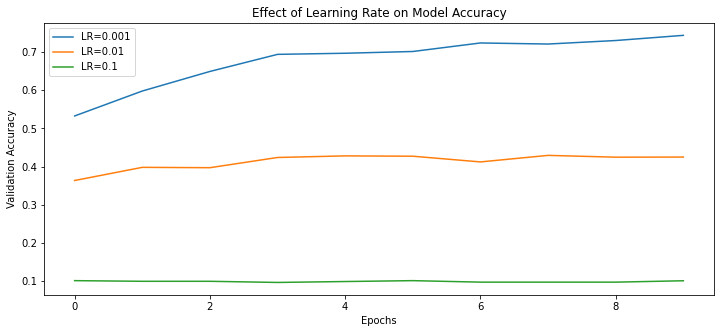

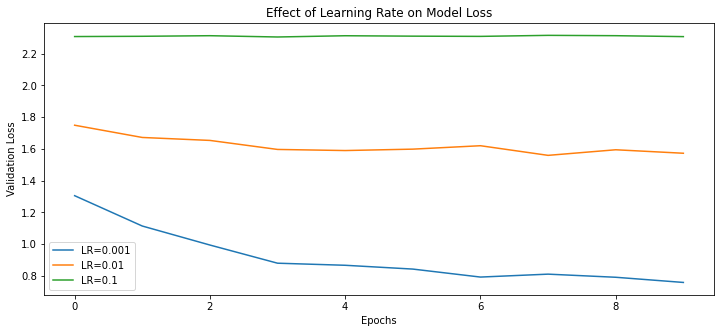

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Define different learning rates to test
learning_rates = [0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
    print(f"\n🔹 Training model with Learning Rate: {lr}")

    # Define CNN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model (without data augmentation)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)
    
    # Store training history
    histories[lr] = history

    # Evaluate test accuracy
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"📌 Test Accuracy with LR={lr}: {test_acc:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(12,5))

for lr, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Learning Rate on Model Accuracy')
plt.legend()
plt.show()

# Plot loss comparison
plt.figure(figsize=(12,5))

for lr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Effect of Learning Rate on Model Loss')
plt.legend()
plt.show()


Batch Size:

In [10]:
import time
# Experiment with different batch sizes
batch_sizes = [16, 32, 64]
histories = {}
training_times = {}

for batch_size in batch_sizes:
    print(f"\n🔹 Training with batch size: {batch_size}")
    
    start_time = time.time()
    
    history = model.fit(
        X_train, y_train, 
        validation_data=(X_test, y_test), 
        epochs=10, 
        batch_size=batch_size, 
        verbose=1
    )
    
    end_time = time.time()
    
    histories[batch_size] = history
    training_times[batch_size] = end_time - start_time


🔹 Training with batch size: 16
Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1006 - loss: 2.3293 - val_accuracy: 0.0978 - val_loss: 2.3109
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1011 - loss: 2.3213 - val_accuracy: 0.0994 - val_loss: 2.3139
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1025 - loss: 2.3212 - val_accuracy: 0.1014 - val_loss: 2.3114
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1002 - loss: 2.3200 - val_accuracy: 0.1017 - val_loss: 2.3288
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1004 - loss: 2.3199 - val_accuracy: 0.1006 - val_loss: 2.3148
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1025 - loss: 2.3208 - val_accuracy: 0.0978 - val_loss: 2.3269
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1024 - loss: 2.3193 - val_accuracy: 0.1016 - val_loss: 2.3242
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/s

Batch Size 16: Training Time = 199.19 seconds
Batch Size 32: Training Time = 189.74 seconds
Batch Size 64: Training Time = 189.08 seconds


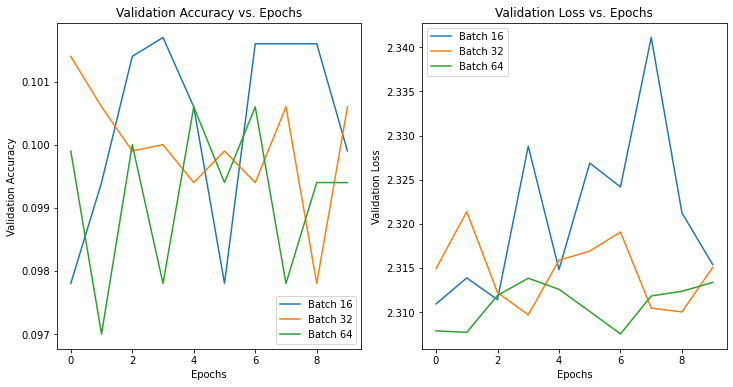

In [11]:
for batch_size, time_taken in training_times.items():
    print(f"Batch Size {batch_size}: Training Time = {time_taken:.2f} seconds")
    
plt.figure(figsize=(12,6))

# Plot accuracy
plt.subplot(1,2,1)
for batch_size, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Batch {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
for batch_size, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Batch {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()

plt.show()


Number of Convolutional Filters:

In [12]:
 import time
import matplotlib.pyplot as plt

# Define different filter sizes to test
filter_sizes = [16, 32, 64]
histories = {}
training_times = {}

for filters in filter_sizes:
    print(f"\n🔹 Training with {filters} filters per convolutional layer")
    
    start_time = time.time()
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,  # Keeping batch size constant for fair comparison
        verbose=1
    )
    
    end_time = time.time()
    
    histories[filters] = history
    training_times[filters] = end_time - start_time



🔹 Training with 16 filters per convolutional layer
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.0981 - loss: 2.3192 - val_accuracy: 0.1000 - val_loss: 2.3061
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.1021 - loss: 2.3163 - val_accuracy: 0.1014 - val_loss: 2.3289
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.0997 - loss: 2.3141 - val_accuracy: 0.0978 - val_loss: 2.3133
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.1019 - loss: 2.3148 - val_accuracy: 0.1000 - val_loss: 2.3164
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.0984 - loss: 2.3170 - val_accuracy: 0.1006 - val_loss: 2.3050
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.1019 - loss: 2.3153 - val_accuracy: 0.0999 - val_loss: 2.3079
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.1005 - loss: 2.3138 - val_accuracy: 0.0999 - val_loss: 2.3073
Epoch 8/10
1250/1250 ━━━

In [13]:
for filters, time_taken in training_times.items():
    print(f"Filters {filters}: Training Time = {time_taken:.2f} seconds")

Filters 16: Training Time = 199.67 seconds
Filters 32: Training Time = 223.56 seconds
Filters 64: Training Time = 200.27 seconds


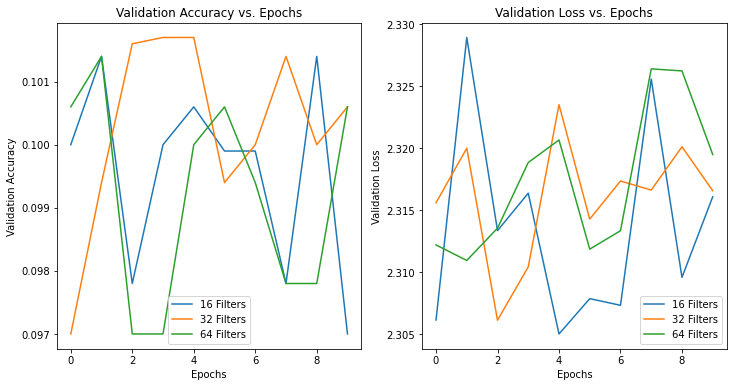

In [14]:
plt.figure(figsize=(12,6))

# Plot accuracy
plt.subplot(1,2,1)
for filters, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{filters} Filters')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
for filters, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{filters} Filters')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()

plt.show()


Number of Layers:

In [15]:
import time
import matplotlib.pyplot as plt

# Function to create the model with a varying number of convolutional layers
def create_model(num_layers):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
    
    for _ in range(num_layers - 1):  # Add convolutional layers dynamically
        model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Different number of convolutional layers to test
layer_configs = [3, 5]
histories = {}
training_times = {}

for num_layers in layer_configs:
    print(f"\n🔹 Training model with {num_layers} convolutional layers")

    model = create_model(num_layers)  # Create model with varying layers
    start_time = time.time()

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    end_time = time.time()
    histories[num_layers] = history
    training_times[num_layers] = end_time - start_time



🔹 Training model with 3 convolutional layers


C:\Users\Laiba\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.3814 - loss: 1.7007 - val_accuracy: 0.5535 - val_loss: 1.2417
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6063 - loss: 1.1113 - val_accuracy: 0.6634 - val_loss: 0.9601
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6913 - loss: 0.8826 - val_accuracy: 0.6718 - val_loss: 0.9331
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7296 - loss: 0.7601 - val_accuracy: 0.6966 - val_loss: 0.8882
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7687 - loss: 0.6599 - val_accuracy: 0.7093 - val_loss: 0.8599
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7942 - loss: 0.5835 - val_accuracy: 0.7038 - val_loss: 0.8964
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.8223 - loss: 0.5100 - val_accuracy: 0.7111 - val_loss: 0.8877
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.8470 -

In [17]:
for layers, time_taken in training_times.items():
    print(f"Layers {layers}: Training Time = {time_taken:.2f} seconds")


Layers 3: Training Time = 284.73 seconds
Layers 5: Training Time = 238.76 seconds


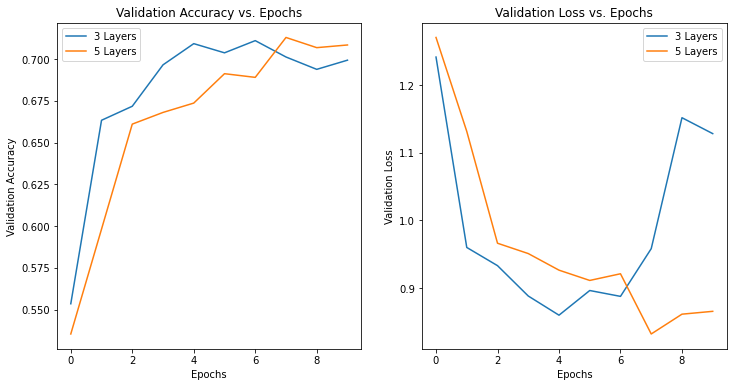

In [18]:
plt.figure(figsize=(12,6))

# Plot accuracy
plt.subplot(1,2,1)
for layers, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{layers} Layers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
for layers, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{layers} Layers')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()

plt.show()
